In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
intrate_df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/Interest_Rate_Prediction/Cleaned_interest_amount_dataset.csv")

In [60]:
intrate_df.head()

,AppliedAmount,Amount,Interest,UseOfLoan,NewCreditCustomer,Age,Gender,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,...,FreeCash,HomeOwnershipType,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,ExpectedReturn,ProbabilityOfDefault,Rating,Restructured
0,2125.0,2125.0,3.089678,7,0,53,0,3,0.000000,13,...,7.760007,7,0.000000,1000.0,0.693147,6.216606,0.141145,0.122216,3,0
1,3000.0,3000.0,2.897016,3,0,50,0,0,0.693147,17,...,7.788543,7,0.000000,1000.0,0.693147,7.496097,0.140436,0.036400,2,0
2,10630.0,9100.0,2.685805,3,1,44,1,0,1.791759,18,...,7.894851,5,0.000000,1000.0,0.000000,0.000000,0.113484,0.041300,0,0
3,1500.0,1500.0,3.723281,7,1,42,1,1,2.079442,13,...,7.931454,4,1.609438,1000.0,0.000000,0.000000,0.183229,0.188726,6,0
4,1595.0,1090.0,4.239743,10,1,34,0,3,0.000000,13,...,7.795568,9,1.945910,1000.0,0.000000,0.000000,0.115240,0.749511,7,0


In [62]:
intrate_df.describe()

,AppliedAmount,Amount,Interest,UseOfLoan,NewCreditCustomer,Age,Gender,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,...,FreeCash,HomeOwnershipType,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,ExpectedReturn,ProbabilityOfDefault,Rating,Restructured
count,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,...,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000
mean,2699.127966,2543.473023,3.411351,8.968661,0.560170,40.389137,0.737434,4.225988,0.247288,11.693391,...,7.788139,6.636310,0.096525,969.038413,0.638903,4.344731,0.130520,0.231987,4.018579,0.312484
std,2342.758228,2182.064156,0.535697,1.364210,0.496368,12.359547,0.574491,1.571991,0.557088,2.424171,...,0.095591,2.029641,0.380086,86.969200,0.723917,4.191922,0.067156,0.139558,1.780162,0.463507
min,10.000000,6.390000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,-0.798891,0.000000,0.000000,0.000000
25%,740.000000,740.000000,3.016025,9.000000,0.000000,31.000000,0.000000,5.000000,0.000000,12.000000,...,7.755339,5.000000,0.000000,1000.000000,0.000000,0.000000,0.100773,0.124240,3.000000,0.000000
50%,2125.000000,2125.000000,3.433987,9.000000,1.000000,39.000000,1.000000,5.000000,0.000000,12.000000,...,7.755339,7.000000,0.000000,1000.000000,0.693147,6.274762,0.128518,0.209589,4.000000,0.000000
75%,4150.000000,3825.000000,3.708682,9.000000,1.000000,49.000000,1.000000,5.000000,0.000000,12.000000,...,7.755339,9.000000,0.000000,1000.000000,1.098612,8.355615,0.150562,0.318264,5.000000,1.000000
max,10632.000000,10632.000000,5.580899,16.000000,1.000000,77.000000,2.000000,5.000000,2.079442,19.000000,...,11.989673,11.000000,2.397895,1000.000000,3.332205,11.195183,0.808546,0.994429,7.000000,1.000000


In [63]:
# Perfroming normalization of data using Robust Scaler.
from sklearn.preprocessing import RobustScaler
X = intrate_df.drop('Interest',axis=1)
scaler = RobustScaler()  
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = intrate_df[['Interest']] 
y = scaler.fit_transform(y)

In [64]:
import joblib

# Save the scaler object to a file so that we can use it for performing predictions later on the new data.
joblib.dump(scaler, 'interest_scaler.pkl')

['interest_scaler.pkl']

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBOOST

In [41]:
import xgboost as xgb
from xgboost import XGBRegressor

# Training and fitting into the model.
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics to analyse model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.04751294090143813
Mean Squared Error (MSE): 0.007683211045843809
Root Mean Squared Error (RMSE): 0.08765392772627938
R² Score: 0.9872501570147139


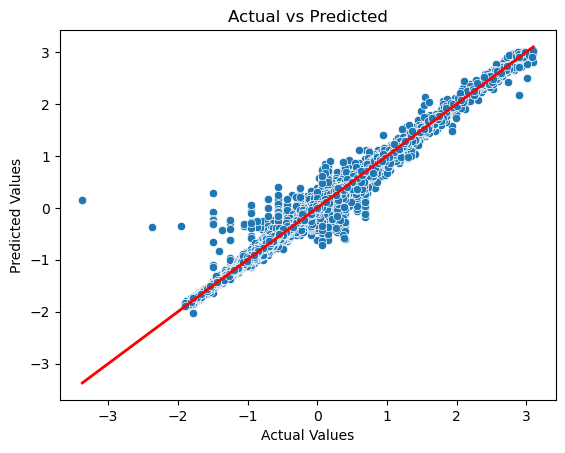

In [43]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()  

# Visualizing the error by plotting actual versus predicted values to see the model's deviation.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Training and fitting the model.
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [45]:
# Calculating the metrics for analysing the model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.028943178355238495
Mean Squared Error (MSE): 0.005435328209184533
Root Mean Squared Error (RMSE): 0.07372467842713547
R² Score: 0.9909803881701146


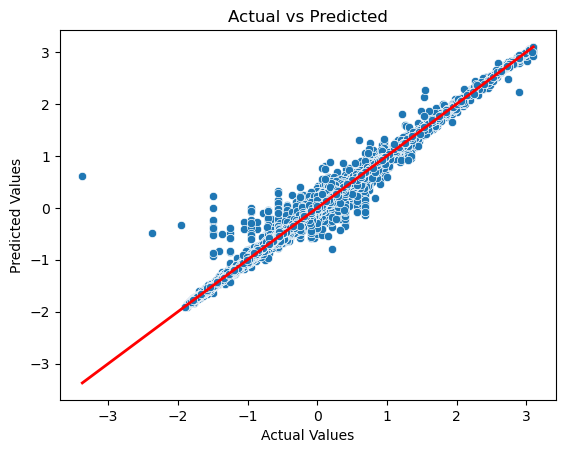

In [46]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()  

# Plotting the actual Vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# Training and fitting the model.
gb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5)
gb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_reg.predict(X_test)

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [67]:
# Calculating metrics for analysing model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.05987899573154482
Mean Squared Error (MSE): 0.009604344806354661
Root Mean Squared Error (RMSE): 0.09800175920030549
R² Score: 0.9840621469946721


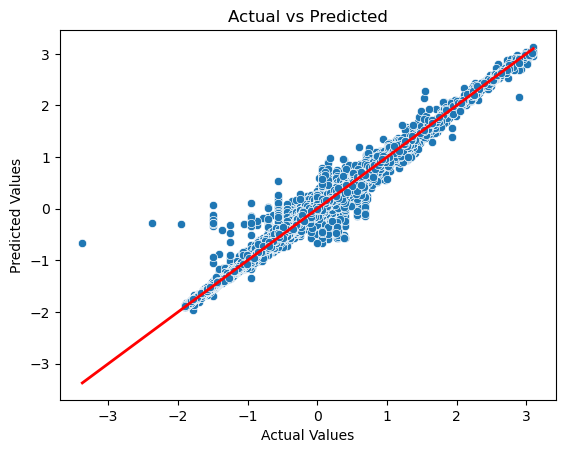

In [68]:
y_test = y_test.ravel()
y_pred = y_pred.ravel() 

# Plotting the scatter plot of actual vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Decision Trees

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Training and fitting the model.
tree_reg = DecisionTreeRegressor(max_depth=200)
tree_reg.fit(X_train, y_train)

# Performing the predictions.
y_pred = tree_reg.predict(X_test)

In [51]:
# Calculating metrics of the model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.033709594899283955
Mean Squared Error (MSE): 0.010079181559600449
Root Mean Squared Error (RMSE): 0.10039512717059752
R² Score: 0.9832741829505499


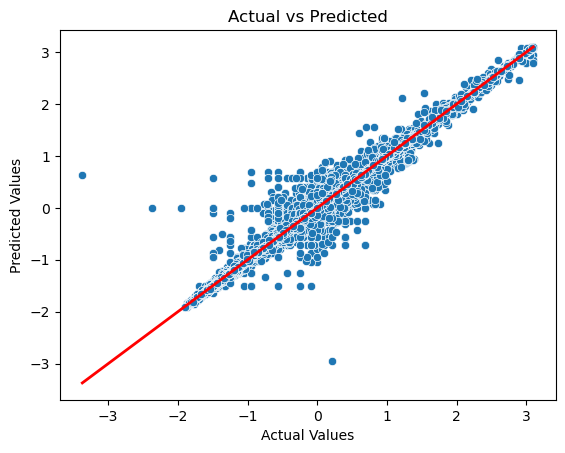

In [52]:
y_test = y_test.ravel()
y_pred = y_pred.ravel() 

# Plotting the actual vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Here the Random Forest model shows the least MAE hence we will use this model for interest rate prediction.

In [69]:
import joblib
import os
# Defining the file path with double backslashes
model_file_path = os.path.join('C:\\Users\\KRISHNA\\Desktop\\SHWETA\\Fall 2024\\Project\\Models', 'interest_model.joblib')

# Save the model
joblib.dump(rf_model, model_file_path)

['C:\\Users\\KRISHNA\\Desktop\\SHWETA\\Fall 2024\\Project\\Models\\interest_model.joblib']